In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('../CSV-files/breast_cancer.csv')
dataframe.head(5)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
X = dataframe.drop(columns = ['id', 'diagnosis'], axis = 1)
Y = dataframe['diagnosis']

In [4]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [5]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.229159        0.963320   0.985565   
texture_mean                0.229159      1.000000        0.234353   0.230829   
perimeter_mean              0.963320      0.234353        1.000000   0.956965   
area_mean                   0.985565      0.230829        0.956965   1.000000   
smoothness_mean             0.099549      0.017135        0.122434   0.092541   
compactness_mean            0.340020      0.184220        0.375540   0.333534   
concavity_mean              0.465087      0.236079        0.497587   0.461843   
concave points_mean         0.566917      0.209629        0.596716   0.561760   
symmetry_mean               0.081502      0.075493        0.101781   0.076963   
fractal_dimension_mean      0.246220      0.039255        0.214661   0.252131   
radius_se                   0.384712      0.247098        0.393716   0.387101   
texture_se                  

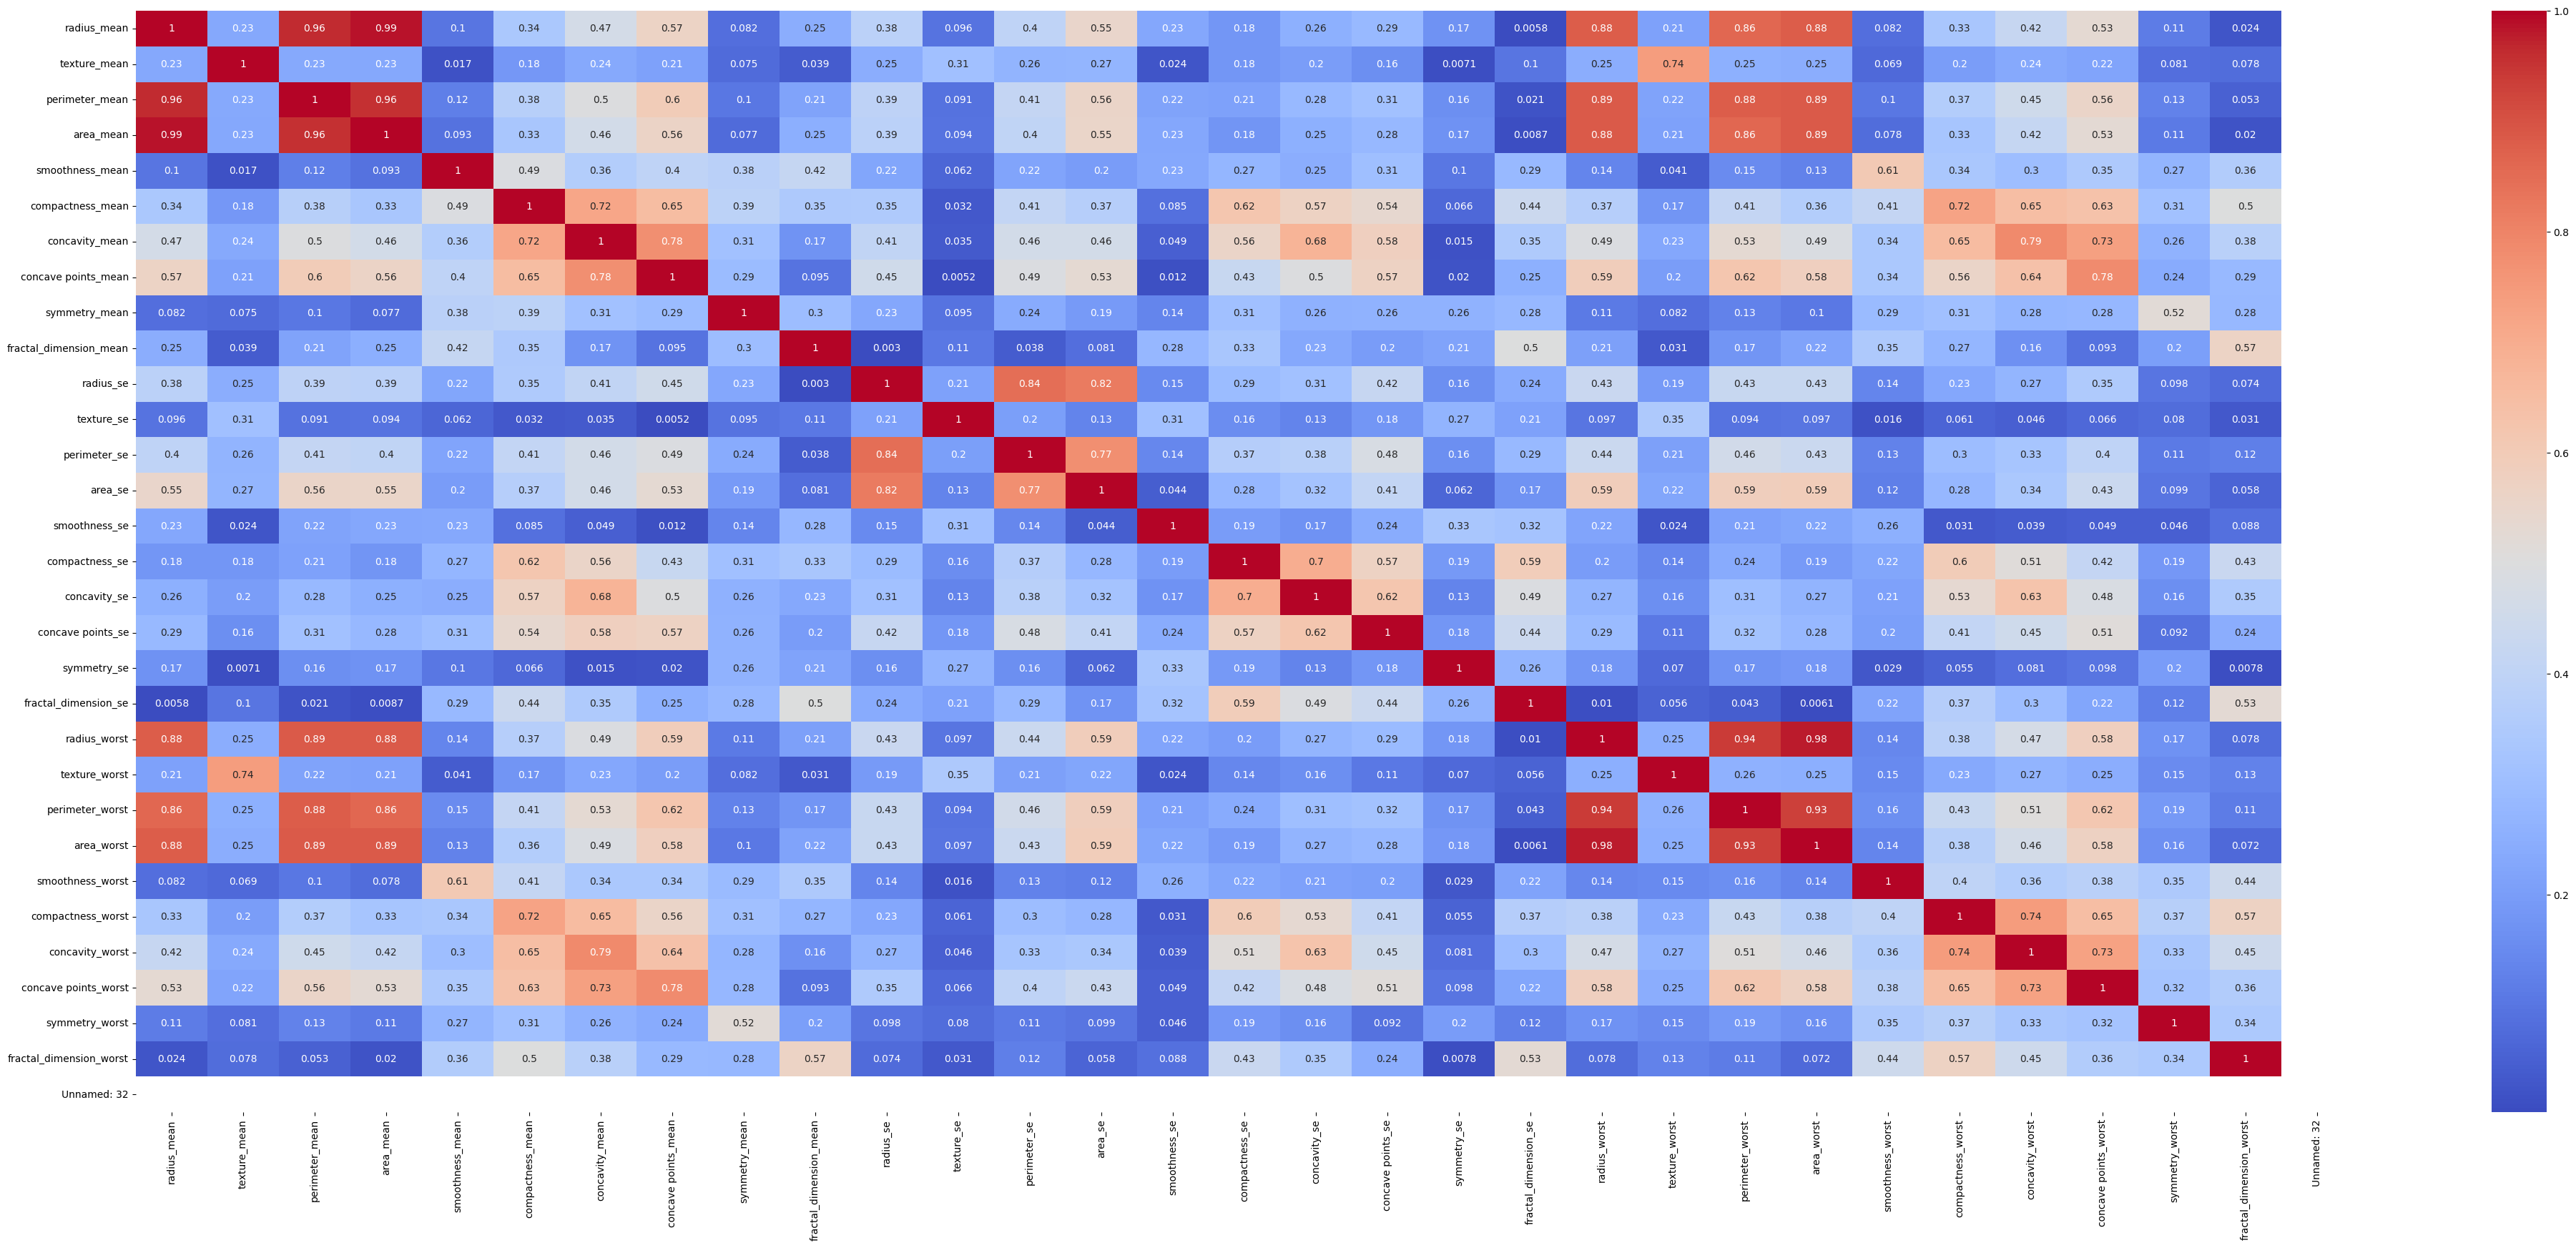

In [6]:
correlation_matrix = X.corr(method = 'kendall').abs()
print(correlation_matrix)

plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
threshold = 0.95
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > (threshold))]
reduced_data = X.drop(columns=to_drop)
X = reduced_data

In [8]:
print(X)
X.describe()

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     concavity_mean  concave points_mean  symmetry_mean  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.18

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,...,16.269190,25.677223,107.261213,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,...,4.833242,6.146258,33.602542,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,...,7.930000,12.020000,50.410000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,...,13.010000,21.080000,84.110000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,...,14.970000,25.410000,97.660000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,...,18.790000,29.720000,125.400000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,...,36.040000,49.540000,251.200000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
X = X.interpolate()
print(X.isnull().sum() > 0)

radius_mean                False
texture_mean               False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
Unnamed: 32                 True
dtype: bool


In [10]:
X = X.dropna(axis = 1)
print(X)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     concavity_mean  concave points_mean  symmetry_mean  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.18

In [11]:
X.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,...,0.003795,16.269190,25.677223,107.261213,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,...,0.002646,4.833242,6.146258,33.602542,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,...,0.000895,7.930000,12.020000,50.410000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,...,0.002248,13.010000,21.080000,84.110000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,...,0.003187,14.970000,25.410000,97.660000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,...,0.004558,18.790000,29.720000,125.400000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,...,0.029840,36.040000,49.540000,251.200000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.3, stratify = Y, random_state = 2)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train, Y_train)

c:\Users\Nikunj_Rathore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)
print("Accuracy score on training dataset: ", training_accuracy*100)

Accuracy score on training dataset:  94.70588235294117


In [16]:
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)
print("Accuracy score on testing dataset: ", testing_accuracy*100)

Accuracy score on testing dataset:  95.73934837092732


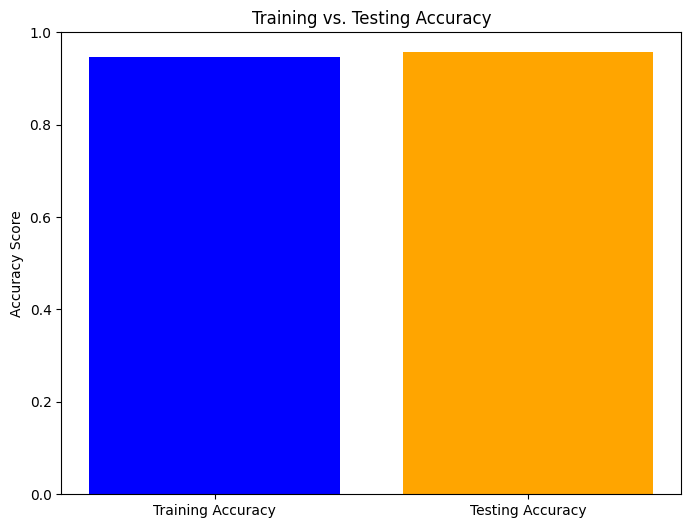

In [17]:
accuracies = [training_accuracy, testing_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy range is from 0 to 1
plt.ylabel('Accuracy Score')
plt.title('Training vs. Testing Accuracy')
plt.show()

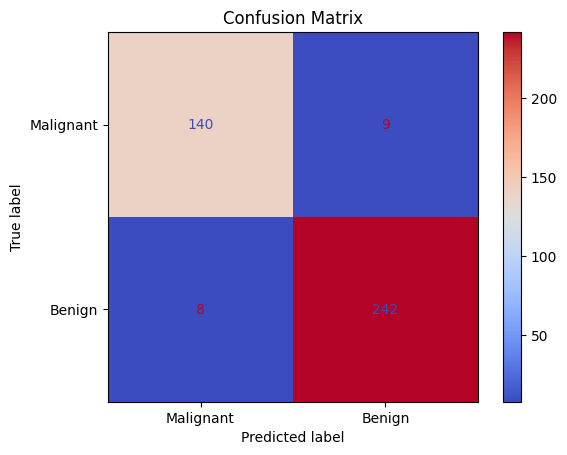

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, testing_prediction, labels=['M', 'B'])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Malignant', 'Benign'])
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Building a predictive model
# input_array = (16.13,20.68,108.1,798.8,0.117,0.2022,0.1722,0.1028,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,20.96,31.48,136.8,1315,0.1789,0.4233,0.4784,0.2073,0.3706,0.1142)
# numpy_array = np.asarray(input_array)

# reshape_array = numpy_array.reshape(1, -1)

# prediction = model.predict(reshape_array)

# if(prediction[0] == 'M'):
#     print("Person has Melignant Cancer.")
# else:
#     print("Person has Benign cancer.")

In [20]:
import pickle

In [21]:
# Save the trained classifier (model) to a file
model_filename = 'breast_cancer_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)